# Assignment 1: Programming for Visualization of CNNs

### Objective:
- Load a pretrained CNN model (or define a simple CNN)
- Pass an image through the model
- Visualize feature maps of convolutional layers


## Step 1: Define a Simple CNN Model

This CNN consists of three convolutional layers followed by max-pooling. 
It will help us understand how convolutional filters transform input images.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
# Define your model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        return x

In [3]:
model = SimpleCNN()

In [4]:
print("-"*100)
print("CNN Architecture")
print("-"*100)
print(model)
print("-"*100)

----------------------------------------------------------------------------------------------------
CNN Architecture
----------------------------------------------------------------------------------------------------
SimpleCNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
----------------------------------------------------------------------------------------------------


## Step 2: Load and Preprocess an Image

The image is resized to 128x128 and converted to a tensor before being passed into the model.

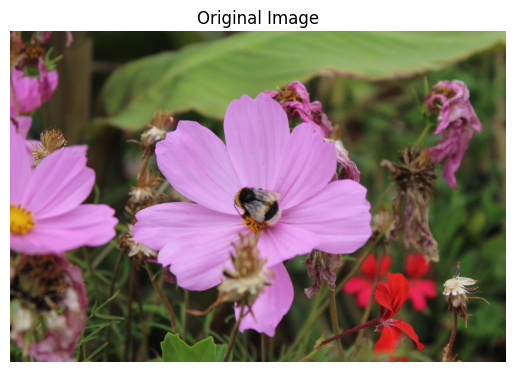

In [5]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Load an image (update the path accordingly)
image_path = "image.jpg"  # Change to your image file
image = Image.open(image_path)
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Display original image
plt.imshow(np.asarray(image))
plt.axis("off")
plt.title("Original Image")
plt.show()

## Step 3: Pass the Image Through the Model

We register forward hooks to capture feature maps from each convolutional layer.

In [6]:
feature_maps = []
def hook_fn(module, input, output):
    feature_maps.append(output)

# Register hooks
model.conv1.register_forward_hook(hook_fn)
model.conv2.register_forward_hook(hook_fn)
model.conv3.register_forward_hook(hook_fn)

In [7]:
# Perform forward pass
with torch.no_grad():
    model(input_image)

## Step 4: Visualize Feature Maps

The feature maps extracted from each convolutional layer are plotted to observe the learned patterns.

In [10]:
def visualize_feature_maps(feature_maps, layer_names):
    for i, fmap in enumerate(feature_maps):
        fmap = fmap.squeeze(0)  # Remove batch dimension
        num_filters = fmap.shape[0]
        grid_size = int(np.ceil(np.sqrt(num_filters)))  # Determine grid size
        
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
        fig.suptitle(f"Feature Maps of {layer_names[i]}", fontsize=16)
        
        for j in range(grid_size * grid_size):
            row, col = divmod(j, grid_size)
            if j < num_filters:
                axes[row, col].imshow(fmap[j].cpu().numpy(), cmap="viridis")
                axes[row, col].axis("off")
            else:
                axes[row, col].axis("off")

        plt.show()

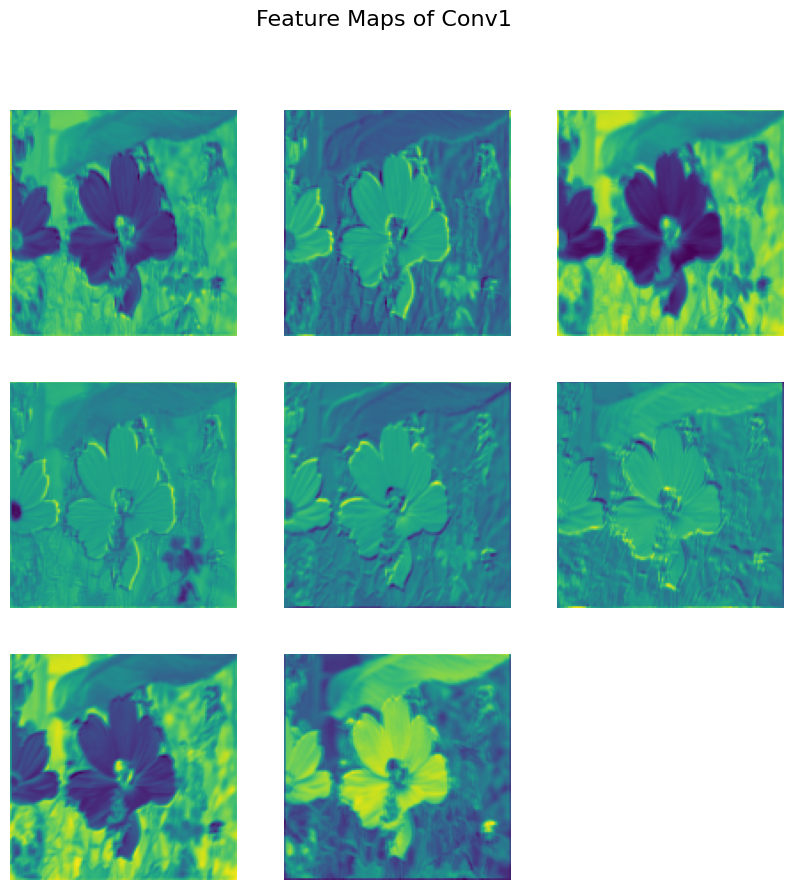

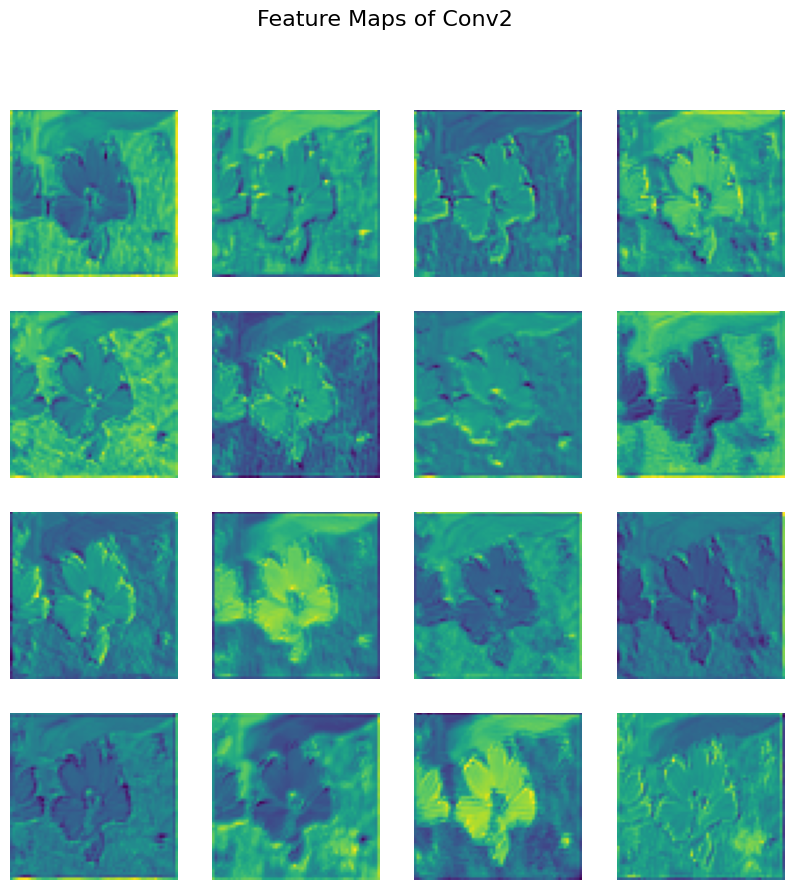

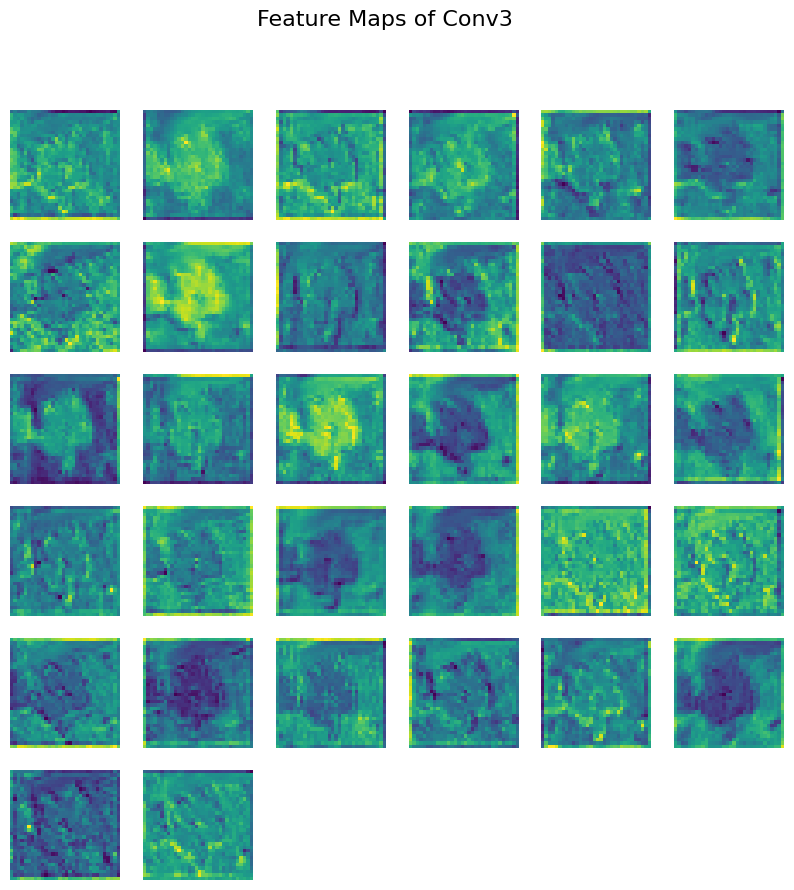

In [11]:
layer_names = ["Conv1", "Conv2", "Conv3"]
visualize_feature_maps(feature_maps, layer_names)

## Conclusion

This notebook provides an intuitive way to visualize the internal representations learned by CNNs. 
You can experiment with different images and observe how feature maps change based on input data. 🚀